In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import glob
%matplotlib inline

In [2]:
flights = pd.read_csv('BigData_Pruned_Drop.csv')
flights.head()

,MONTH,DOW,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DISTANCE,ARRIVAL_DELAY,DIVERTED,CANCELLED,dept_temp,...,arr_precip,arr_alti,arr_vsby,arr_sky,CertificateDate,Manu,Model,DAYS,DEPARTURE_HOUR,ARRIVAL_HOUR
0,1,4,AS,ANC,SEA,1448,-22,0,0,33.80,...,0,30.32,10,CLR,2012.0,BOEING,737-990ER,0,9.1,13.5
1,1,4,DL,ANC,SEA,1448,-24,0,0,33.80,...,0,30.32,10,CLR,2001.0,AIRBUS,A321-211,0,9.8,14.2
2,1,4,AA,LAX,PBI,2330,-9,0,0,46.04,...,0,30.21,10,FEW,2009.0,BOEING,737-890,0,8.2,15.8
3,1,4,DL,DTW,PBI,1086,-8,0,0,17.96,...,0,30.21,10,FEW,2000.0,BOEING,737-832,0,13.0,16.1
4,1,4,AA,LGA,PBI,1035,-12,0,0,28.04,...,0,30.21,10,FEW,2014.0,AIRBUS,A320-232,0,12.5,15.5


In [3]:
delayed = []
for i, j in enumerate(flights["ARRIVAL_DELAY"]):
    if (j > 15):
        delayed.append(1)
    else:
        delayed.append(0)
        

In [4]:
flights["DELAYED"] = delayed

In [6]:
month_dict={
    1:  '01- January',
    2:  '02- February',
    3:  '03- March',
    4:  '04- April',
    5:  '05- May',
    6:  '06- June',
    7:  '07- July',
    8:  '08- August',
    9:  '09- September',
    10: '10- October',
    11: '11- November',
    12: '12- December'
}
flights['MONTH_desc'] = flights['MONTH'].apply(lambda m: month_dict[m])

# 3. Day of the week name
dow_dict = {
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday',
    7: 'Sunday',
    1: 'Monday'
}
flights['DOW_desc'] = flights['DOW'].apply(lambda d: dow_dict[d])

In [11]:
import datetime
def serial_date_to_string(srl_no):
    new_date = datetime.datetime(2015,1,1,0,0) + datetime.timedelta(srl_no)
    return new_date.strftime("%Y-%m-%d")

In [28]:
airlines = pd.read_csv('airlines.csv')

In [29]:
airlines_dict = dict(zip(airlines['IATA_CODE'],airlines['AIRLINE']))

In [30]:
flights['AIRLINE_desc'] = flights['AIRLINE'].apply(lambda a: airlines_dict[a])

In [12]:
flights['SCHEDULED_DEPARTURE'] = flights['DAYS'].apply(lambda x: serial_date_to_string(x))

In [13]:
flights['SCHEDULED_DEPARTURE'].head()

0    2015-01-01
1    2015-01-01
2    2015-01-01
3    2015-01-01
4    2015-01-01
Name: SCHEDULED_DEPARTURE, dtype: object

In [18]:
flights['DATE'] = pd.to_datetime(flights['SCHEDULED_DEPARTURE'], yearfirst=True)

In [ ]:
flights['DATE'].head()

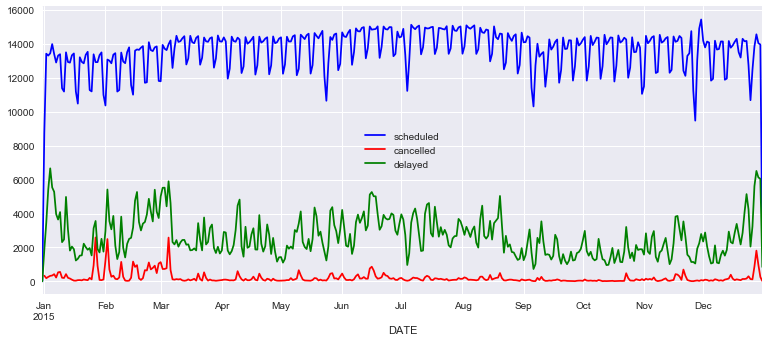

In [20]:
fig = plt.figure(figsize=(10,4));

ax = fig.add_axes([0,0,1,1]);

flights.groupby('DATE').count()['SCHEDULED_DEPARTURE'].plot.line(c='b', label="scheduled");
#flights[flights['CANCELLED'] == 0].groupby('DATE').count()['SCHEDULED_DEPARTURE'].plot.line(c='b', label="operated");
flights[flights['CANCELLED'] == 1].groupby('DATE').count()['SCHEDULED_DEPARTURE'].plot.line(c='r', label="cancelled");
flights[flights['DELAYED'] == 1].groupby('DATE').count()['SCHEDULED_DEPARTURE'].plot.line(c='g', label="delayed");

ax.legend();

In [31]:
pvt_scheduled_airline_date = flights.pivot_table(index="MONTH_desc",columns="AIRLINE_desc",values="SCHEDULED_DEPARTURE",aggfunc=lambda x: x.count())
pvt_scheduled_airline_date.head()

AIRLINE_desc,Alaska Airlines Inc.,American Airlines Inc.,American Eagle Airlines Inc.,Atlantic Southeast Airlines,Delta Air Lines Inc.,Frontier Airlines Inc.,Hawaiian Airlines Inc.,JetBlue Airways,Skywest Airlines Inc.,Southwest Airlines Co.,Spirit Air Lines,US Airways Inc.,United Air Lines Inc.,Virgin America
MONTH_desc,,,,,,,,,,,,,,
01- January,11035.0,36916.0,25020.0,41820.0,53886.0,5663.0,5276.0,18115.0,40223.0,84111.0,7314.0,28052.0,32315.0,3970.0
02- February,10147.0,33575.0,22771.0,37992.0,51446.0,4850.0,4840.0,16581.0,36899.0,75994.0,6778.0,25177.0,30544.0,3533.0
03- March,12024.0,39217.0,23900.0,45970.0,63194.0,5900.0,5418.0,19270.0,42541.0,92913.0,8004.0,29338.0,37063.0,4179.0
04- April,11923.0,38268.0,21861.0,41965.0,61659.0,6097.0,5167.0,18690.0,41986.0,90415.0,8025.0,27635.0,35341.0,4183.0
05- May,12704.0,38283.0,21781.0,41966.0,63869.0,6960.0,5485.0,19231.0,42497.0,92117.0,8563.0,28932.0,38078.0,4513.0


In [38]:
x = airlines['AIRLINE']

In [39]:
lol = []
for i in x:
    lol.append(i)

In [41]:
lol = sorted(lol)
lol

['Alaska Airlines Inc.',
 'American Airlines Inc.',
 'American Eagle Airlines Inc.',
 'Atlantic Southeast Airlines',
 'Delta Air Lines Inc.',
 'Frontier Airlines Inc.',
 'Hawaiian Airlines Inc.',
 'JetBlue Airways',
 'Skywest Airlines Inc.',
 'Southwest Airlines Co.',
 'Spirit Air Lines',
 'US Airways Inc.',
 'United Air Lines Inc.',
 'Virgin America']

In [24]:
count = 0
for i in flights["DELAYED"]:
    if i == 1:
        count += 1
count
        

964036

In [32]:
count1 = 0
for i in flights["CANCELLED"]:
    if i == 1:
        count1 += 1
count1
        

76376

In [33]:
count1 / len(flights)

0.015344924266883867

In [21]:
fig.savefig("DOW.png", bbox_inches = 'tight')

In [11]:
sum(flights["ARRIVAL_DELAY"]) / len(flights["ARRIVAL_DELAY"])

4.3610979932543756

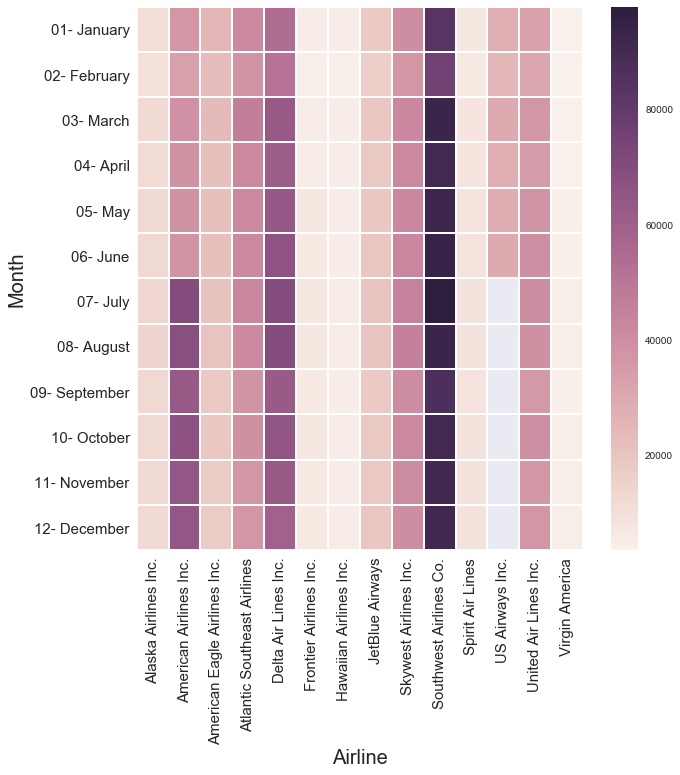

In [57]:
fig = plt.figure(figsize=(10,10))
sns.heatmap(pvt_scheduled_airline_date, linecolor="w", linewidths=1);
ax.set_xticklabels(labels = lol, rotation =40, fontsize = 12)
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.xlabel("Airline", fontsize = 20)
plt.ylabel("Month", fontsize = 20)
plt.tick_params(axis='both', which='major', labelsize=15)

In [59]:
fig.savefig("HeatMap.png", bbox_inches = "tight")

In [ ]:
orig_airports = flights['ORIGIN_AIRPORT'].tolist()
dest_airports = flights['DESTINATION_AIRPORT'].tolist()

In [ ]:
le_airports = preprocessing.LabelEncoder()
le_airports.fit(orig_airports)
#print(le_airports.classes_)
enc_orig_airports = le_airports.transform(orig_airports)
enc_dest_airports = le_airports.transform(dest_airports) 

enc_dest_airports

In [ ]:
flights['ORIGIN_AIRPORT'] = enc_orig_airports
flights['DESTINATION_AIRPORT'] = enc_dest_airports
flights.head()

In [6]:
manufacts = flights['Manu'].tolist()

le_manu = preprocessing.LabelEncoder()
le_manu.fit(manufacts)
#print(le_airports.classes_)
enc_manufacts = le_manu.transform(manufacts)

flights['Manu'] = enc_manufacts
flights.head()

,MONTH,DOW,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DISTANCE,ARRIVAL_DELAY,dept_temp,dept_dew,dept_hum,...,arr_precip,arr_alti,arr_vsby,arr_sky,CertificateDate,Manu,Model,DAYS,DEPARTURE_HOUR,ARRIVAL_HOUR
0,1,4,AS,17,277,1448,-22,33.80,30.20,86.49,...,0,30.32,10,CLR,2012.0,6,737-990ER,0,9.1,13.5
1,1,4,DL,17,277,1448,-24,33.80,32.00,93.03,...,0,30.32,10,CLR,2001.0,1,A321-211,0,9.8,14.2
2,1,4,AA,176,235,2330,-9,46.04,19.94,35.05,...,0,30.21,10,FEW,2009.0,6,737-890,0,8.2,15.8
3,1,4,DL,93,235,1086,-8,17.96,6.98,61.57,...,0,30.21,10,FEW,2000.0,6,737-832,0,13.0,16.1
4,1,4,AA,182,235,1035,-12,28.04,6.08,38.69,...,0,30.21,10,FEW,2014.0,1,A320-232,0,12.5,15.5


In [7]:
models = flights['Model'].tolist()

le_model = preprocessing.LabelEncoder()
le_model.fit(models)
#print(le_airports.classes_)
enc_models = le_model.transform(models)

flights['Model'] = enc_models
flights.head()

,MONTH,DOW,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DISTANCE,ARRIVAL_DELAY,dept_temp,dept_dew,dept_hum,...,arr_precip,arr_alti,arr_vsby,arr_sky,CertificateDate,Manu,Model,DAYS,DEPARTURE_HOUR,ARRIVAL_HOUR
0,1,4,AS,17,277,1448,-22,33.80,30.20,86.49,...,0,30.32,10,CLR,2012.0,6,53,0,9.1,13.5
1,1,4,DL,17,277,1448,-24,33.80,32.00,93.03,...,0,30.32,10,CLR,2001.0,1,103,0,9.8,14.2
2,1,4,AA,176,235,2330,-9,46.04,19.94,35.05,...,0,30.21,10,FEW,2009.0,6,46,0,8.2,15.8
3,1,4,DL,93,235,1086,-8,17.96,6.98,61.57,...,0,30.21,10,FEW,2000.0,6,45,0,13.0,16.1
4,1,4,AA,182,235,1035,-12,28.04,6.08,38.69,...,0,30.21,10,FEW,2014.0,1,102,0,12.5,15.5


In [8]:
arr_sky = flights['arr_sky'].tolist()
dept_sky = flights['dept_sky'].tolist()

le_sky = preprocessing.LabelEncoder()
le_sky.fit(arr_sky)
#print(le_airports.classes_)
enc_arr_sky = le_sky.transform(arr_sky)
enc_dept_sky = le_sky.transform(dept_sky)

flights['dept_sky'] = enc_dept_sky
flights['arr_sky'] = enc_arr_sky
flights.head()

,MONTH,DOW,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DISTANCE,ARRIVAL_DELAY,dept_temp,dept_dew,dept_hum,...,arr_precip,arr_alti,arr_vsby,arr_sky,CertificateDate,Manu,Model,DAYS,DEPARTURE_HOUR,ARRIVAL_HOUR
0,1,4,AS,17,277,1448,-22,33.80,30.20,86.49,...,0,30.32,10,1,2012.0,6,53,0,9.1,13.5
1,1,4,DL,17,277,1448,-24,33.80,32.00,93.03,...,0,30.32,10,1,2001.0,1,103,0,9.8,14.2
2,1,4,AA,176,235,2330,-9,46.04,19.94,35.05,...,0,30.21,10,2,2009.0,6,46,0,8.2,15.8
3,1,4,DL,93,235,1086,-8,17.96,6.98,61.57,...,0,30.21,10,2,2000.0,6,45,0,13.0,16.1
4,1,4,AA,182,235,1035,-12,28.04,6.08,38.69,...,0,30.21,10,2,2014.0,1,102,0,12.5,15.5


In [5]:
airlines = flights['AIRLINE'].tolist()
le_airline = preprocessing.LabelEncoder()
le_airline.fit(airlines)
#print(le_airports.classes_)
enc_airlines = le_airline.transform(airlines)

flights['AIRLINE'] = enc_airlines
flights.head()

,AIRLINE,dept_temp,dept_dew,dept_hum,dept_alti,dept_vsby,arr_hum,DAYS,DEPARTURE_HOUR,ARRIVAL_HOUR,ARRIVAL_DELAY
0,1,33.80,30.20,86.49,30.18,1,74.70,0,9.1,13.5,-22
1,3,33.80,32.00,93.03,30.16,1,74.70,0,9.8,14.2,-24
2,0,46.04,19.94,35.05,30.06,10,81.85,0,8.2,15.8,-9
3,3,17.96,6.98,61.57,30.00,10,81.85,0,13.0,16.1,-8
4,0,28.04,6.08,38.69,30.17,10,81.85,0,12.5,15.5,-12


In [4]:
list(flights)

['AIRLINE',
 'dept_temp',
 'dept_dew',
 'dept_hum',
 'dept_alti',
 'dept_vsby',
 'arr_hum',
 'DAYS',
 'DEPARTURE_HOUR',
 'ARRIVAL_HOUR',
 'ARRIVAL_DELAY']

In [6]:
features = [i for i in list(flights) if i != "ARRIVAL_DELAY"]

In [7]:
features

['AIRLINE',
 'dept_temp',
 'dept_dew',
 'dept_hum',
 'dept_alti',
 'dept_vsby',
 'arr_hum',
 'DAYS',
 'DEPARTURE_HOUR',
 'ARRIVAL_HOUR']

In [32]:
featuresKeep = [features[i] for i in top10]
featuresKeep

['dept_dew',
 'dept_alti',
 'AIRLINE',
 'dept_hum',
 'dept_vsby',
 'ARRIVAL_HOUR',
 'DEPARTURE_HOUR',
 'arr_hum',
 'dept_temp',
 'DAYS']

In [7]:
X = flights[features]
y = flights["ARRIVAL_DELAY"]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [13]:
sum(y_train)/ len(y_train)

4.3705694832700708

In [15]:
x = [4.3705694832700708 for i in range(len(y_test))]

In [16]:
mean_absolute_error(y_test, x)

21.155373297833648

#parameters = {'criterion': ["mae"], 'min_samples_split' : [0.05, .15, .2], 'max_depth': [10,20,30,40], 'min_impurity_split' : [.00001, 0.0001, .001, .01]}

In [15]:
parameters = {'min_samples_split' : [0.05, .1, .15, .2]}

In [9]:
regressor = DecisionTreeRegressor(min_samples_split = 0.0001)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=0.0001,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [10]:
a = regressor.predict(X_test)

In [11]:
a

array([ 16.73747017,   2.27675277,  -5.2345679 , ...,   5.82232346,
        -7.29277567,   4.10552764])

In [ ]:
regressor = DecisionTreeRegressor()
clf = GridSearchCV(regressor, parameters)
clf.fit(X_train, y_train)

In [16]:
X_new = SelectKBest(chi2, k=5).fit_transform(X, y)

ValueError: Input X must be non-negative.

In [38]:
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [58]:
b = regressor.feature_importances_
len(b)

28

In [63]:
a = zip(X.columns, regressor.feature_importances_)
for i in a:
    print (i)

('MONTH', 0.0028100704301275933)
('DOW', 0.032658328300337318)
('AIRLINE', 0.050680050818507578)
('ORIGIN_AIRPORT', 0.038426403646046228)
('DESTINATION_AIRPORT', 0.027173389702918691)
('DISTANCE', 0.036077817191289982)
('dept_temp', 0.068062365716839296)
('dept_dew', 0.044342529725505786)
('dept_hum', 0.055112870799337563)
('dept_windspd', 0.027000582263818781)
('dept_precip', 0.0013496610122443276)
('dept_alti', 0.049617084016962361)
('dept_vsby', 0.05627456231408981)
('dept_sky', 0.0028689084398587361)
('arr_temp', 0.033419968827261365)
('arr_dew', 0.022251442120310671)
('arr_hum', 0.064925925750954072)
('arr_windspd', 0.02225563924963414)
('arr_precip', 0.00080274111876291339)
('arr_alti', 0.03571745933336095)
('arr_vsby', 0.018865218917167415)
('arr_sky', 0.0029945573085534008)
('CertificateDate', 0.0062441727612615695)
('Manu', 0.0014216957010039903)
('Model', 0.0059102467085538086)
('DAYS', 0.17102452590773745)
('DEPARTURE_HOUR', 0.064065611445151008)
('ARRIVAL_HOUR', 0.057646170

In [57]:
sorted(zip(map(lambda x: round(x, 4), regressor.feature_importances_), names), 
             reverse=True)

NameError: name 'names' is not defined

In [65]:
a = regressor.feature_importances_
a

array([ 0.00281007,  0.03265833,  0.05068005,  0.0384264 ,  0.02717339,
        0.03607782,  0.06806237,  0.04434253,  0.05511287,  0.02700058,
        0.00134966,  0.04961708,  0.05627456,  0.00286891,  0.03341997,
        0.02225144,  0.06492593,  0.02225564,  0.00080274,  0.03571746,
        0.01886522,  0.00299456,  0.00624417,  0.0014217 ,  0.00591025,
        0.17102453,  0.06406561,  0.05764617])

In [52]:
b = a[:]
b = sorted(b)
c = b[::-1]
c[:10]

[0.17102452590773745,
 0.068062365716839296,
 0.064925925750954072,
 0.064065611445151008,
 0.057646170472403162,
 0.05627456231408981,
 0.055112870799337563,
 0.050680050818507578,
 0.049617084016962361,
 0.044342529725505786]

In [51]:
a

array([ 0.00281007,  0.03265833,  0.05068005,  0.0384264 ,  0.02717339,
        0.03607782,  0.06806237,  0.04434253,  0.05511287,  0.02700058,
        0.00134966,  0.04961708,  0.05627456,  0.00286891,  0.03341997,
        0.02225144,  0.06492593,  0.02225564,  0.00080274,  0.03571746,
        0.01886522,  0.00299456,  0.00624417,  0.0014217 ,  0.00591025,
        0.17102453,  0.06406561,  0.05764617])

In [66]:
cols = []
for i, j in enumerate(a):
    if j in c[:10]:
        cols.append(features[i])
cols
#BEST WAY TO FIND MAPPING

['AIRLINE',
 'dept_temp',
 'dept_dew',
 'dept_hum',
 'dept_alti',
 'dept_vsby',
 'arr_hum',
 'DAYS',
 'DEPARTURE_HOUR',
 'ARRIVAL_HOUR']

In [40]:
clf = ExtraTreesClassifier()
clf = clf.fit(X_train, y_train)

KeyboardInterrupt: 

In [25]:
y_pred = regressor.predict(X_test)

In [26]:
mean_absolute_error(y_test, y_pred)

19.913205296315109

Mean_absolute_error if just using average: 21.155373297833648

In [74]:
df1 = flights[['AIRLINE',
 'dept_temp',
 'dept_dew',
 'dept_hum',
 'dept_alti',
 'dept_vsby',
 'arr_hum',
 'DAYS',
 'DEPARTURE_HOUR',
 'ARRIVAL_HOUR', 'ARRIVAL_DELAY']]

In [75]:
list(df1)

['AIRLINE',
 'dept_temp',
 'dept_dew',
 'dept_hum',
 'dept_alti',
 'dept_vsby',
 'arr_hum',
 'DAYS',
 'DEPARTURE_HOUR',
 'ARRIVAL_HOUR',
 'ARRIVAL_DELAY']

In [76]:
df1.head()

,AIRLINE,dept_temp,dept_dew,dept_hum,dept_alti,dept_vsby,arr_hum,DAYS,DEPARTURE_HOUR,ARRIVAL_HOUR,ARRIVAL_DELAY
0,1,33.80,30.20,86.49,30.18,1,74.70,0,9.1,13.5,-22
1,3,33.80,32.00,93.03,30.16,1,74.70,0,9.8,14.2,-24
2,0,46.04,19.94,35.05,30.06,10,81.85,0,8.2,15.8,-9
3,3,17.96,6.98,61.57,30.00,10,81.85,0,13.0,16.1,-8
4,0,28.04,6.08,38.69,30.17,10,81.85,0,12.5,15.5,-12


In [77]:
df1.to_csv("BigData_Pruned_Top10.csv", index = False)